# OpenCV Tutorial Sample 8: ocv_dog_img

[Sample 08](sample_08/ocv_dog_img.py) is a program that overlays a Digital On-Screen Graphic (DOG) or logo onto a still image. DOG is a form of digital watermarking routinely used on broadcast TV to show the TV channel logo. It can also be used on digital signage to watermark content. 

In previous samples, we have seen how to overlay text on images and video. This sample shows how to overlay and image on another image.

The logo image (DOG) is usually a PNG file that is capable of preserving transparency information, in other words, the alpha channel.

In the interactive tutorial, we will use matplotlib to display some of the intermediate results.

First we start off with the usual initializations...

In [1]:
#!/usr/bin/env python

# Python 2/3 compatibility
from __future__ import print_function
# Allows use of print like a function in Python 2.x

# Import OpenCV and other needed Python modules
import numpy as np
import cv2

Next load the image to be watermarked. We will call this the source image. For illustrative purposes, we will display this image in a named window called "Source Image". Remember the window will remained grayed out until the event handler cv2.waitkey() is called.

In [2]:
# Load the source image
img = cv2.imread('Intel_Wall.jpg')
# Create a named window to show the source image
cv2.namedWindow('Source Image', cv2.WINDOW_NORMAL)
# Display the source image
cv2.imshow('Source Image',img)

Next load the logo image with which the source image will be watermarked. A second named window called "Result Image" will help serve as a placeholder to handle intermediate outputs, resizing and the final image.

In [3]:
# Load the logo image
dog = cv2.imread('Intel_Logo.png')
# Create a named window to handle intermediate outputs and resizing
cv2.namedWindow('Result Image', cv2.WINDOW_NORMAL)

The Logo image and source image are not te same size. So we need to first find the size of the logo. We do this using the numpy shape object.

In [4]:
# To put logo on top-left corner, create a Region of Interest (ROI)
rows,cols,channels = dog.shape
roi = img[0:rows, 0:cols ]
# Print out the dimensions of the logo...
print(dog.shape)

(270, 270, 3)


Now convert the logo image to grayscale for faster processing... 
Only in the interactive tutorial, we will use matplotlib to display the result.

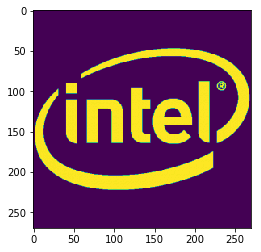

In [5]:
# Convert the logo to grayscale
dog_gray = cv2.cvtColor(dog,cv2.COLOR_BGR2GRAY)
# The code below in this cell is only to display the intermediate result and not in the script
from matplotlib import pyplot as plt
plt.imshow(dog_gray)
plt.show()

Next create a mask and inverse mask of the logo image ...

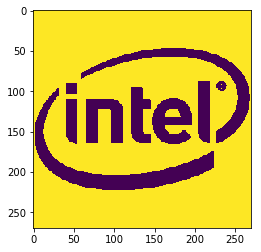

In [6]:
# Create a mask of the logo and its inverse mask
ret, mask = cv2.threshold(dog_gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# The code below in this cell is only to display the intermediate result and not in the script
plt.imshow(mask_inv)
plt.show()

Now we blackout the logo within the ROI so that we can extract it from its background.

In [7]:
# Now blackout the area of logo in ROI
img_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

Perform the extraction

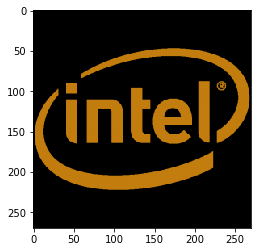

In [8]:
# Now just extract the logo
dog_fg = cv2.bitwise_and(dog,dog,mask = mask)
# The code below in this cell is only to display the intermediate result and not in the script
plt.imshow(dog_fg)
plt.show()

Now we add the logo to the source image. We can use the OpenCV [cv2.add()](http://docs.opencv.org/3.0-last-rst/modules/core/doc/operations_on_arrays.html#cv2.add) function.

In [9]:
# Next add the logo to the source image
dst = cv2.add(img_bg,dog_fg)
img[0:rows, 0:cols ] = dst

Time to display the result

In [ ]:
# Display the Result
cv2.imshow('Result Image',img)
# Wait until windows are dismissed
cv2.waitKey(0)

Now release all resources used

In [ ]:
# Release all resources used
cv2.destroyAllWindows()

In this example, we used some OpenCV image processing API's to extract the logo from its background. Using the alpha channel or transaprency of the PNG can also be exploited to produce the same effect. You can also reduce the opacity of the logo itself.